In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import io
%cd "C:\Users\Sanja\OneDrive\Desktop\Hr"

C:\Users\Sanja\OneDrive\Desktop\Hr


In [3]:
# Data

trian = pd.read_csv("Train Hr Analytics.csv")
test = pd.read_csv("Test Hr Analytics.csv")

In [4]:
# Understanding the data
print(trian.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
None
<class '

In [5]:
# Temporarily Add Dependent Variable for concatenation 

test['is_promoted']='test'

In [6]:
# Concat both the data frames for preprocessing

combined_hr = pd.concat([trian,test],axis=0)

In [7]:
print("The Shape of combined data :",combined_hr.shape)

The Shape of combined data : (78298, 14)


In [8]:
combined_hr=combined_hr.drop('employee_id',axis=1)

In [9]:
combined_hr.previous_year_rating=combined_hr.previous_year_rating.astype('object')

In [10]:
# Data Preprocessing

combined_hr.isnull().sum().sort_values(ascending=False)

previous_year_rating    5936
education               3443
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
combined_hr.previous_year_rating.value_counts(dropna=False)

# since missing values are lessthan 70% of the data impute with 3.0

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: previous_year_rating, dtype: int64

In [12]:
combined_hr.previous_year_rating=combined_hr.previous_year_rating.fillna(3.0)

In [13]:
combined_hr.education.value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [14]:
combined_hr.education=combined_hr.education.fillna("Bachelor's")

In [15]:
# split back to train and test for EDA

train_df=combined_hr.iloc[0:54808]
test_df=combined_hr.iloc[54808 : 78298]

In [16]:
print(trian.shape)
print(train_df.shape)
print(test.shape)
print(test_df.shape)

(54808, 14)
(54808, 13)
(23490, 14)
(23490, 13)


In [17]:
test_df=test_df.drop('is_promoted',axis=1)

In [18]:
# Exploratory Data Analysis

# How many employees got promoted. Create pie Chart
# How many male and female employees are there. Create Pie chart
# How many employees won awards? Create Pie chart
# How many employees met KPI's? Create Pie Chart

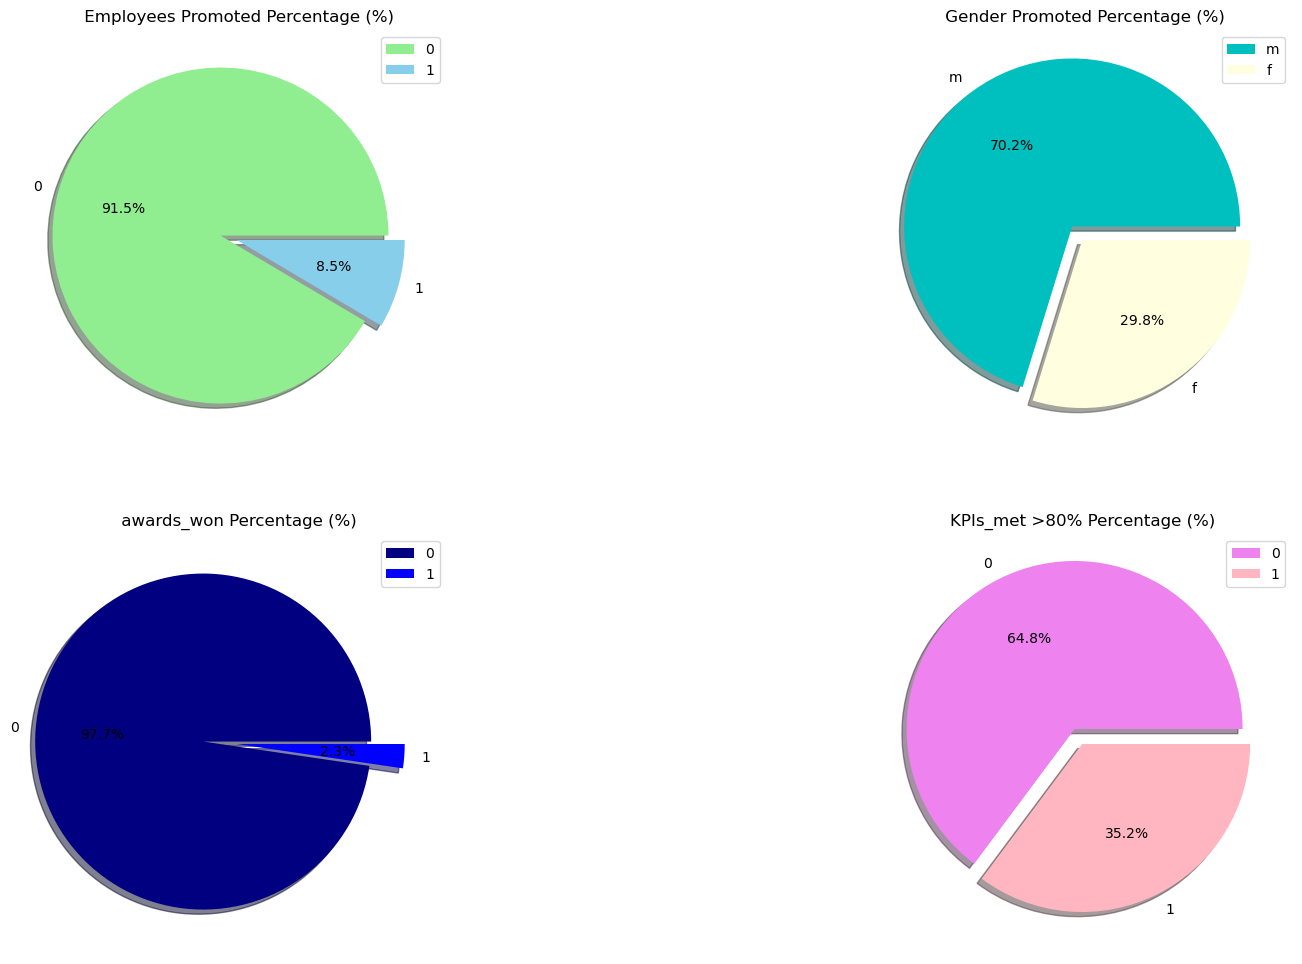

In [19]:

plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
plt.pie(train_df.is_promoted.value_counts(),autopct='%.1f%%',
       labels=train_df.is_promoted.value_counts().index,
       colors=['lightgreen','skyblue'],explode=[0.1,0],shadow=True)
plt.title(" Employees Promoted Percentage (%)")
plt.legend(loc='upper right')

plt.subplot(2,2,2)
plt.pie(train_df.gender.value_counts(),autopct='%.1f%%',
       labels=train_df.gender.value_counts().index,
       colors=['c','lightyellow'],explode=[0.1,0],shadow=True)
plt.title(" Gender Promoted Percentage (%)")
plt.legend(loc='upper right')

plt.subplot(2,2,3)
plt.pie(train_df['awards_won?'].value_counts(),autopct='%.1f%%',
       labels=train_df['awards_won?'].value_counts().index,
       colors=['navy','blue'],explode=[0.2,0],shadow=True)
plt.title(" awards_won Percentage (%)")
plt.legend(loc='upper right')

plt.subplot(2,2,4)
plt.pie(train_df['KPIs_met >80%'].value_counts(),autopct='%.1f%%',
       labels=train_df['KPIs_met >80%'].value_counts().index,
       colors=['violet','lightpink'],explode=[0.1,0],shadow=True)
plt.title("KPIs_met >80% Percentage (%)")
plt.legend(loc='upper right')

In [20]:
# Cross Tabulations - Stacked Bar plot
# How many male & female employees got promoted
# How many employees who won awards got promoted
# How many employees in each department got promoted
# How many employees got promoted with relation to education

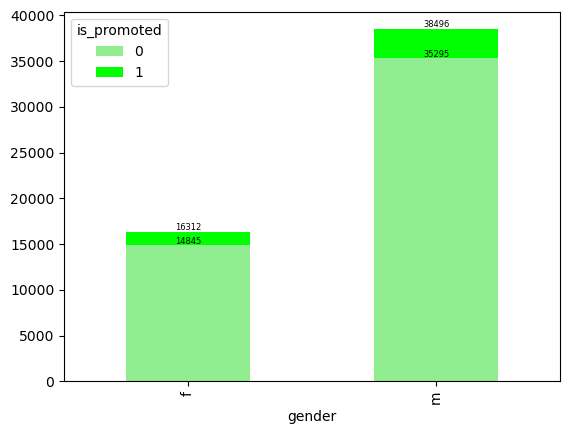

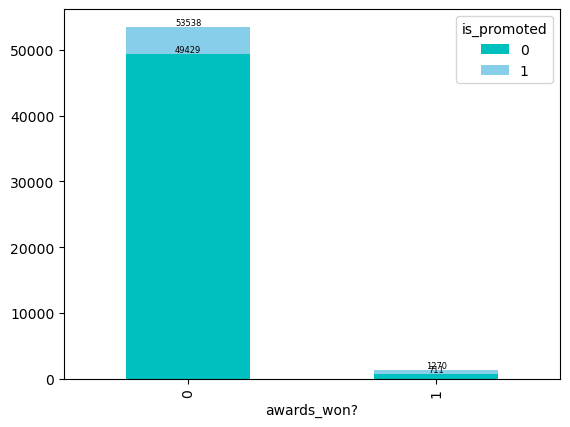

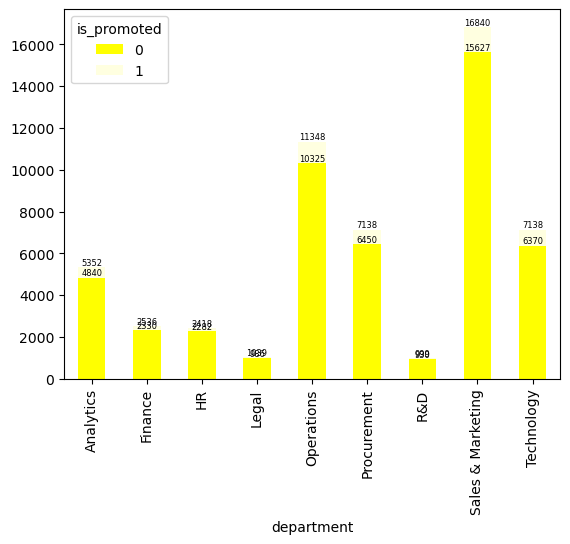

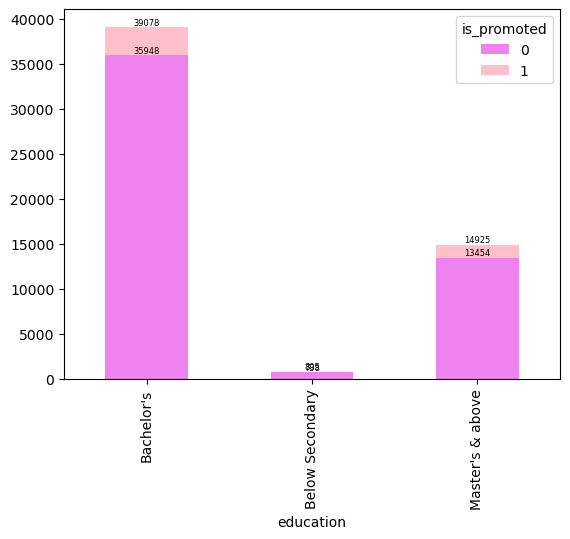

In [21]:

ax = pd.crosstab(train_df.gender,train_df.is_promoted).plot(kind='bar', stacked=True, color=['lightgreen','lime'])
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

ax= pd.crosstab(train_df['awards_won?'],train_df.is_promoted).plot(kind='bar', stacked=True, color=['c','skyblue'])
for i in ax.containers:
    ax.bar_label(i, fontsize=6)
    
ax = pd.crosstab(train_df.department,train_df.is_promoted).plot(kind='bar', stacked=True, color=['yellow', 'lightyellow',])
for i in ax.containers:
    ax.bar_label(i,fontsize=6)
    
ax = pd.crosstab(train_df.education,train_df.is_promoted).plot(kind='bar', stacked=True, color=['violet', 'pink',])
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

In [22]:
# Use hrtraindf for EDA
# What is the Average avg_training_score of is_promoted 0 & 1?
# What is the Average length_of_service of is_promoted 0 & 1?
# What is the Average avg_training_score of male and female ?
# What is the Average length_of_service of male and female ?
# What is the Average avg_training_score of different departments?
# What is the Average length_of_service of awardswon? ?

Text(0.5, 1.0, 'Average Lenght of Service for awardds_won?')

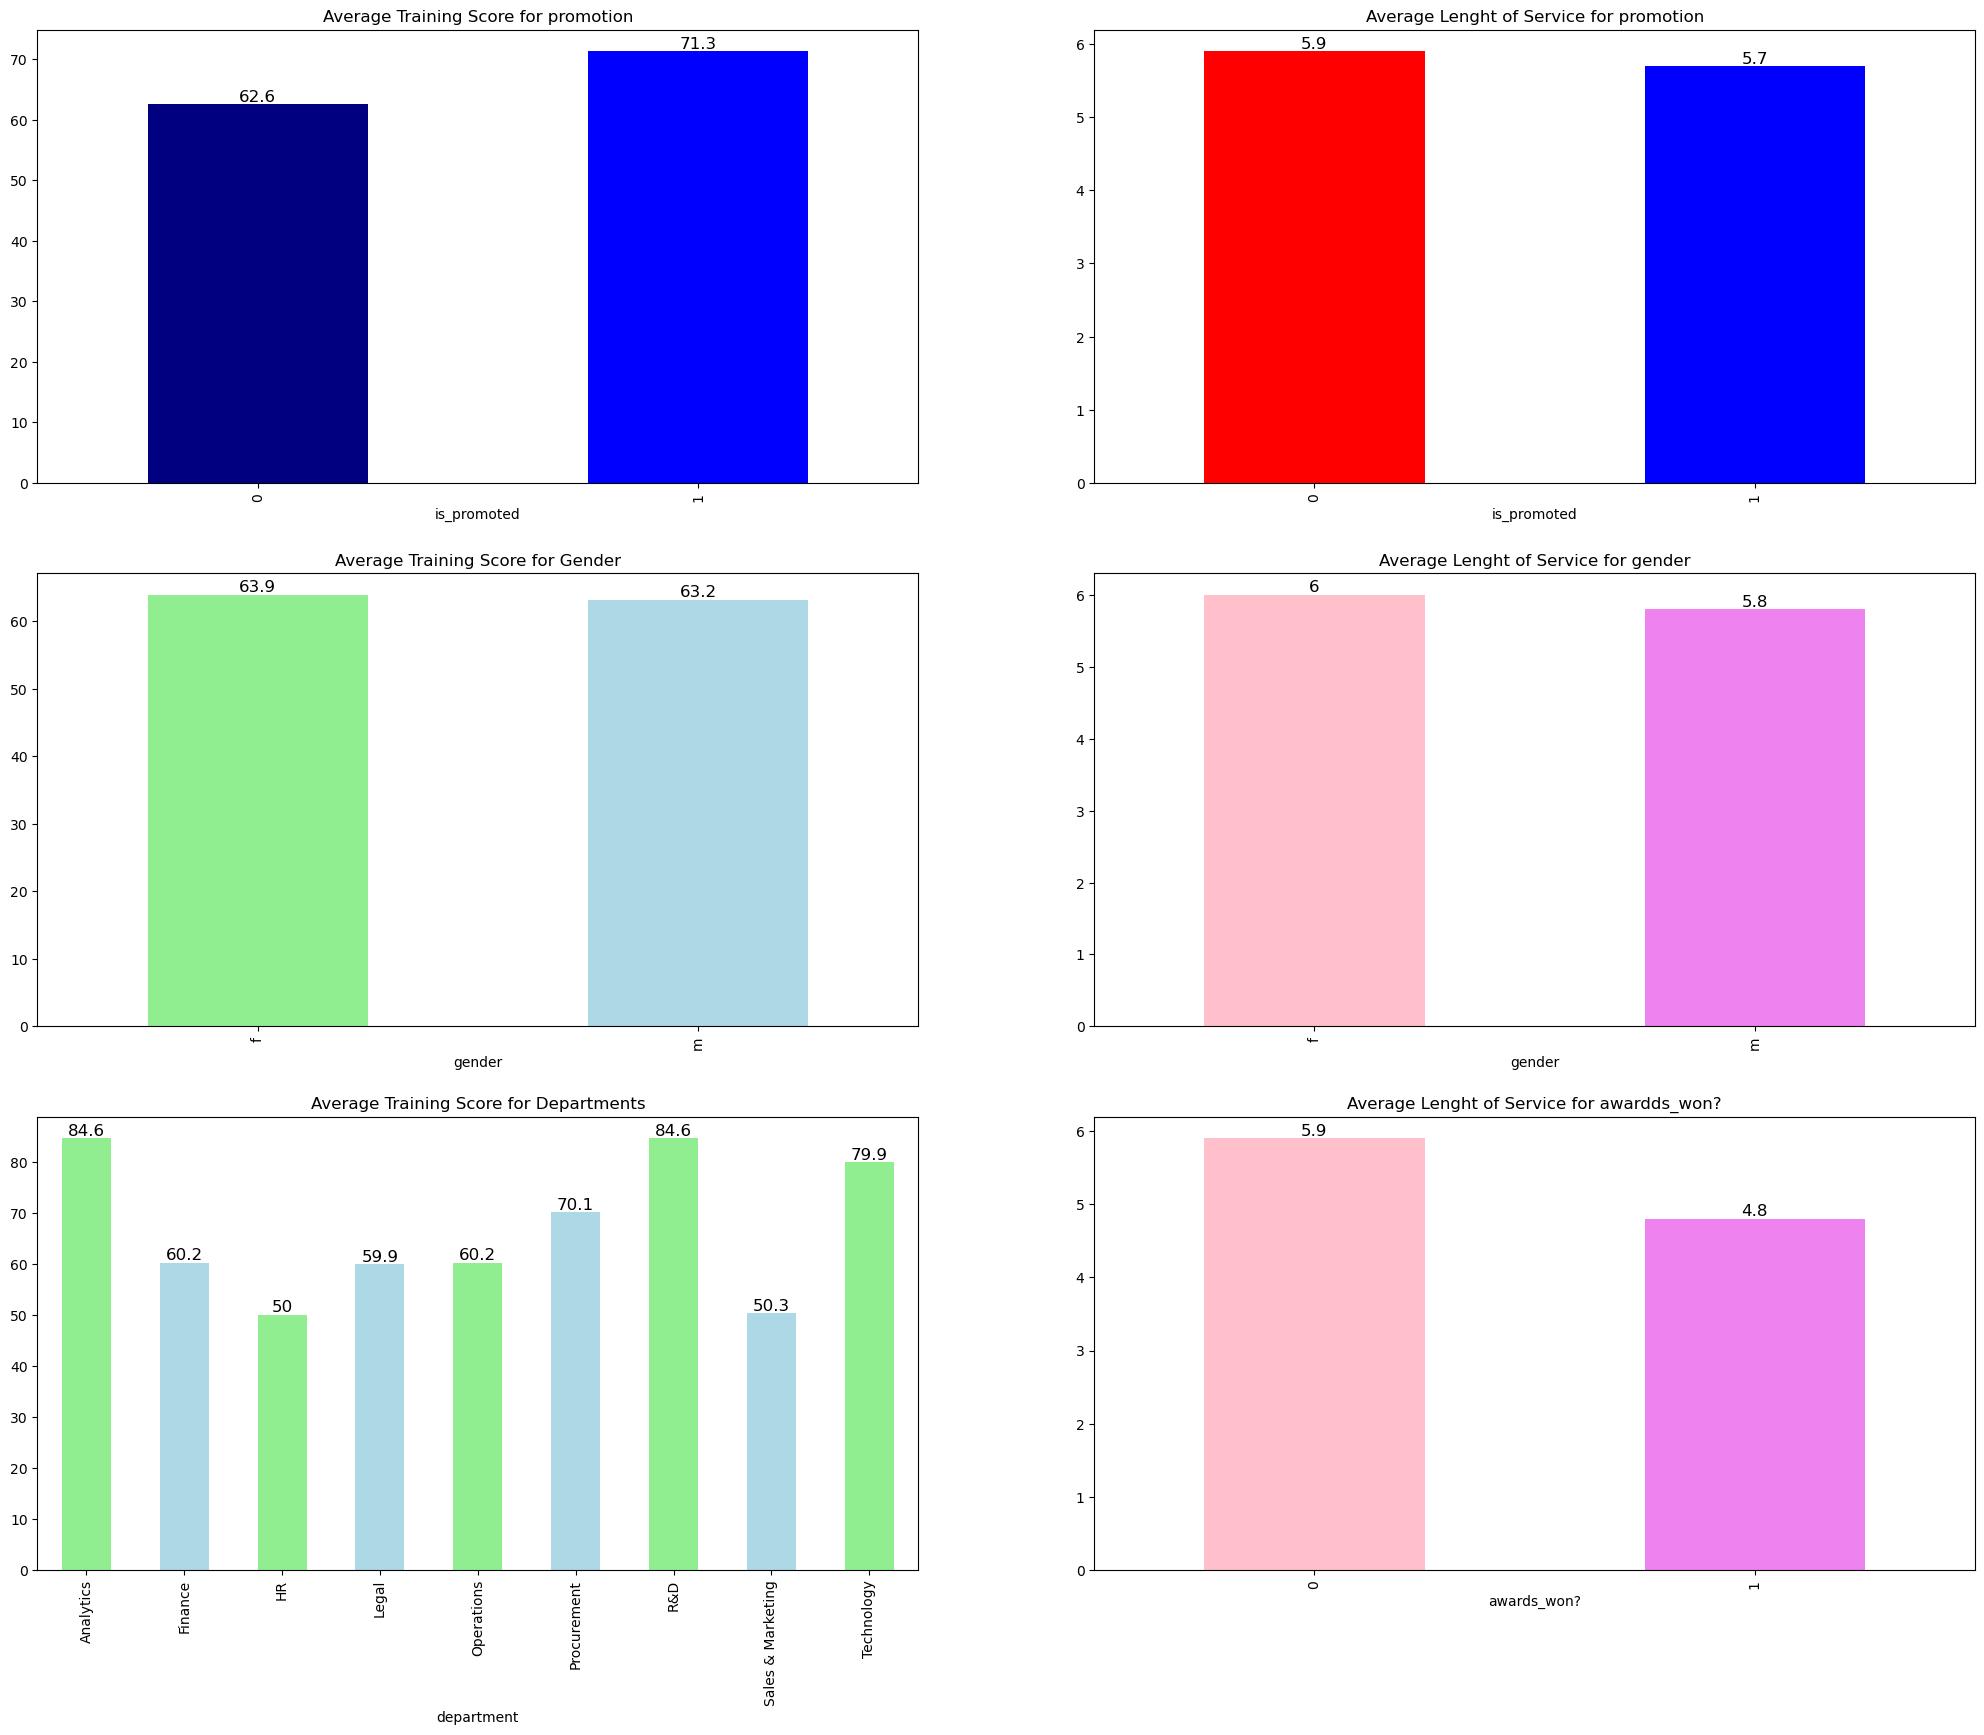

In [23]:
plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
ax = np.round(train_df.avg_training_score.groupby(train_df.is_promoted).mean(),1).plot(kind='bar', color=['navy','blue'])
for i in ax.containers:
    ax.bar_label(i,fontsize =12)
plt.title("Average Training Score for promotion")

plt.subplot(3,2,2)
ax = np.round(train_df.length_of_service.groupby(train_df.is_promoted).mean(),1).plot(kind='bar', color=['red','blue'])
for i in ax.containers:
    ax.bar_label(i,fontsize =12)
plt.title("Average Lenght of Service for promotion")

plt.subplot(3,2,3)
ax = np.round(train_df.avg_training_score.groupby(train_df.gender).mean(),1).plot(kind='bar', color=['lightgreen','lightblue'])
for i in ax.containers:
    ax.bar_label(i,fontsize =12)
plt.title("Average Training Score for Gender")

plt.subplot(3,2,4)
ax = np.round(train_df.length_of_service.groupby(train_df.gender).mean(),1).plot(kind='bar', color=['pink','violet'])
for i in ax.containers:
    ax.bar_label(i,fontsize =12)
plt.title("Average Lenght of Service for gender")

plt.subplot(3,2,5)
ax = np.round(train_df.avg_training_score.groupby(train_df.department).mean(),1).plot(kind='bar', color=['lightgreen','lightblue'])
for i in ax.containers:
    ax.bar_label(i,fontsize =12)
plt.title("Average Training Score for Departments")

plt.subplot(3,2,6)
ax = np.round(train_df.length_of_service.groupby(train_df['awards_won?']).mean(),1).plot(kind='bar', color=['pink','violet'])
for i in ax.containers:
    ax.bar_label(i,fontsize =12)
plt.title("Average Lenght of Service for awardds_won?")

In [24]:
# Hypothesis Testing


from scipy.stats import ttest_ind,f_oneway,chi2_contingency

In [25]:
# Test Null Average avg_training_score of is_promoted 0 & 1 equal
# Test Null Average avg_training_score of male and female equal
# Test Null Average length_of_service of different education equal
# Test Null Average avg_training_score of different education equal
# Test Null No Association between is_promoted and gender
# Test Null No Association between is_promoted and department
# Test Null No Association between is_promoted and 'KPIs_met >80%'

In [26]:
# Group by
np.round(train_df.avg_training_score.groupby(train_df.is_promoted).mean(),2)

is_promoted
0    62.65
1    71.33
Name: avg_training_score, dtype: float64

In [27]:
# split data

promoted_yes=train_df[train_df.is_promoted==1]
promoted_no=train_df[train_df.is_promoted==0]

In [28]:
# conduct test

ttest_ind(promoted_yes.avg_training_score,promoted_no.avg_training_score,equal_var=False)

# since p value is lessthan 0.05 Reject Null

Ttest_indResult(statistic=38.82675007357188, pvalue=7.662329172468838e-291)

In [29]:
# Group By

np.round(train_df.avg_training_score.groupby(train_df.gender).mean(),2)

gender
f    63.89
m    63.17
Name: avg_training_score, dtype: float64

In [30]:
# Split data

male=train_df[train_df.gender=='m']
female=train_df[train_df.gender=='f']

In [31]:
ttest_ind(male.avg_training_score,female.avg_training_score,equal_var=False)

Ttest_indResult(statistic=-6.122262326710494, pvalue=9.321257169457854e-10)

In [32]:
#  Group By
np.round(train_df.avg_training_score.groupby(train_df.education).mean(),2)

education
Bachelor's          63.10
Below Secondary     64.93
Master's & above    64.06
Name: avg_training_score, dtype: float64

In [33]:
# split data

bachelor=train_df[train_df.education=="Bachelor's"]
below_secondary=train_df[train_df.education=="Below Secondary"]
masters=train_df[train_df.education=="Master's & above"]

In [34]:
#conduct test
f_oneway(bachelor.avg_training_score,below_secondary.avg_training_score,masters.avg_training_score)

# since the pvalue is lessthan 0.05 Reject Null

F_onewayResult(statistic=33.5035375621275, pvalue=2.873996658407989e-15)

In [35]:
# Group By
np.round(train_df.length_of_service.groupby(train_df.education).mean(),2)

education
Bachelor's          5.29
Below Secondary     1.70
Master's & above    7.61
Name: length_of_service, dtype: float64

In [36]:
# Conduct test

f_oneway(bachelor.length_of_service,below_secondary.length_of_service,masters.length_of_service)

# since pvalue is lessthan 0.05 Reject Null

F_onewayResult(statistic=2139.467105075957, pvalue=0.0)

In [37]:
chi2_contingency(pd.crosstab(train_df.gender,train_df.is_promoted))

# since pvalue is lessthan 0.05 Reject Null

Chi2ContingencyResult(statistic=6.677254566546107, pvalue=0.009765091521176657, dof=1, expected_freq=array([[14922.70617428,  1389.29382572],
       [35217.29382572,  3278.70617428]]))

In [38]:
chi2_contingency(pd.crosstab(train_df.department,train_df.is_promoted))

# since pvalue is lessthan 0.05 Reject Null

Chi2ContingencyResult(statistic=151.4263551632387, pvalue=9.882497107474632e-29, dof=8, expected_freq=array([[ 4896.1699022 ,   455.8300978 ],
       [ 2320.00875785,   215.99124215],
       [ 2212.05882353,   205.94117647],
       [  950.50831995,    88.49168005],
       [10381.49029339,   966.50970661],
       [ 6530.05619618,   607.94380382],
       [  913.91512188,    85.08487812],
       [15405.73638885,  1434.26361115],
       [ 6530.05619618,   607.94380382]]))

In [39]:
chi2_contingency(pd.crosstab(train_df['KPIs_met >80%'],train_df.is_promoted))

# since pvalue is lessthan 0.05 Reject Null

Chi2ContingencyResult(statistic=2689.3220548467057, pvalue=0.0, dof=1, expected_freq=array([[32492.01539921,  3024.98460079],
       [17647.98460079,  1643.01539921]]))

### Data Transformation

In [40]:
objcols=combined_hr[['department', 'region', 'education', 'gender', 'recruitment_channel','previous_year_rating',
                    'KPIs_met >80%', 'awards_won?']]
numcols=combined_hr[['no_of_trainings', 'age',  'length_of_service','avg_training_score','is_promoted']]

In [41]:
objcols_dummy=pd.get_dummies(objcols,columns=['department', 'region', 'education', 'gender', 'recruitment_channel',
                                      'previous_year_rating','KPIs_met >80%', 'awards_won?'])

In [42]:
objcols_dummy.head()

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,...,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [43]:
objcols_dummy['is_promoted']=numcols.is_promoted

In [44]:
numcols=numcols.drop('is_promoted',axis=1)

In [45]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [46]:
scaler=StandardScaler()

In [47]:
numcols_scaled=scaler.fit_transform(numcols)

In [48]:
# converting back to dataframe
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [49]:
numcols_scaled.head()

,no_of_trainings,age,length_of_service,avg_training_score
0,-0.417590,0.026400,0.506357,-1.072184
1,-0.417590,-0.625841,-0.435253,-0.250282
2,-0.417590,-0.104048,0.270954,-0.997466
3,1.230501,0.548193,0.977162,-0.997466
4,-0.417590,1.330882,-0.906058,0.721058


In [50]:
objcols_dummy=objcols_dummy.reset_index()

In [51]:
numcols_scaled=numcols_scaled.reset_index()

In [52]:
# concat all the three dataframes into one

final_df=pd.concat([numcols_scaled,objcols_dummy ],axis=1)

In [53]:
final_trian=final_df[final_df.is_promoted!='test']
final_test=final_df[final_df.is_promoted=='test']

In [54]:
final_test=final_test.drop('is_promoted',axis=1)

In [55]:
# split back into X any y

X=final_trian.drop('is_promoted',axis=1)
y=final_trian.is_promoted

In [56]:
y=LabelEncoder().fit_transform(y)

In [57]:
X=X.drop('index',axis=1)

In [58]:
X.head()

,no_of_trainings,age,length_of_service,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,-0.417590,0.026400,0.506357,-1.072184,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,-0.417590,-0.625841,-0.435253,-0.250282,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,-0.417590,-0.104048,0.270954,-0.997466,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,1.230501,0.548193,0.977162,-0.997466,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,-0.417590,1.330882,-0.906058,0.721058,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


### Sampling Methods

In [59]:
from imblearn.over_sampling import SMOTENC

In [60]:
smote=SMOTENC(categorical_features=list(range(5,60)))

In [61]:
X_smote, y_smote = smote.fit_resample(X,y)

In [62]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_smote).value_counts())

0    50140
1     4668
dtype: int64
0    50140
1    50140
dtype: int64


### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,classification_report

In [64]:
logit=LogisticRegression(max_iter=3000)

In [65]:
logitmodel=logit.fit(X,y)

In [66]:
logitmodel.score(X,y)

0.9316158225076631

In [67]:
logitpredict=logitmodel.predict(X)

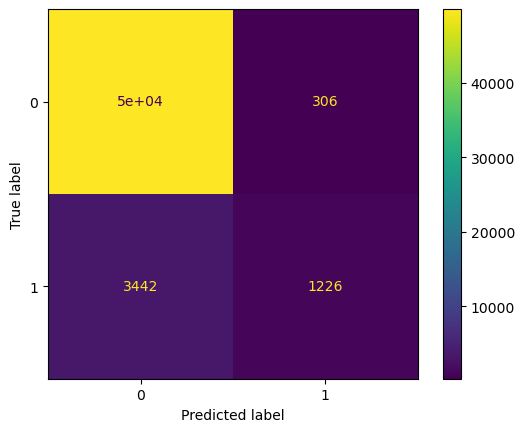

In [68]:
ConfusionMatrixDisplay.from_predictions(y,logitpredict)

In [69]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     50140
           1       0.80      0.26      0.40      4668

    accuracy                           0.93     54808
   macro avg       0.87      0.63      0.68     54808
weighted avg       0.92      0.93      0.92     54808



In [70]:
# balanced data

In [71]:
logitsmote=logit.fit(X_smote,y_smote)

In [72]:
logitsmote.score(X_smote,y_smote)

0.9025029916234544

In [73]:
logitsmote_predict=logitmodel.predict(X_smote)

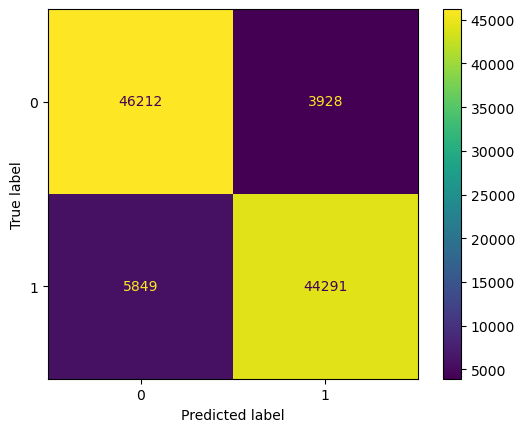

In [74]:
ConfusionMatrixDisplay.from_predictions(y_smote,logitsmote_predict)

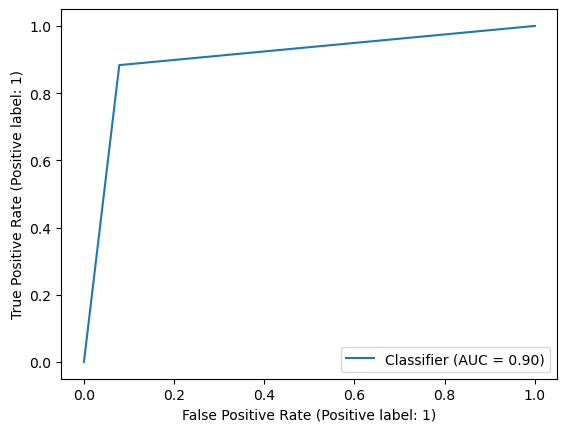

In [75]:
RocCurveDisplay.from_predictions(y_smote,logitsmote_predict)

In [76]:
print(classification_report(y_smote,logitsmote_predict))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     50140
           1       0.92      0.88      0.90     50140

    accuracy                           0.90    100280
   macro avg       0.90      0.90      0.90    100280
weighted avg       0.90      0.90      0.90    100280



### Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
tree=DecisionTreeClassifier(max_depth=20)

In [79]:
treemodel=tree.fit(X_smote,y_smote)

In [80]:
treemodel.score(X_smote,y_smote)

0.929297965696051

In [81]:
treepredict=treemodel.predict(X_smote)

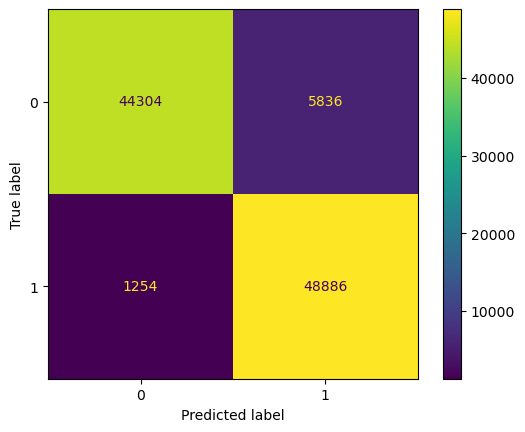

In [82]:
ConfusionMatrixDisplay.from_predictions(y_smote,treepredict)

In [83]:
print(classification_report(y_smote,treepredict))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93     50140
           1       0.89      0.97      0.93     50140

    accuracy                           0.93    100280
   macro avg       0.93      0.93      0.93    100280
weighted avg       0.93      0.93      0.93    100280



### Ensemble Methods
  
    # RandomForest

In [84]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [85]:
RF=RandomForestClassifier(n_estimators=3000, max_depth=14)

In [86]:
RFmodel=RF.fit(X_smote,y_smote)

In [87]:
RFmodel.score(X_smote,y_smote)

0.8724272038292781

In [88]:
RFpredict=RFmodel.predict(X_smote)

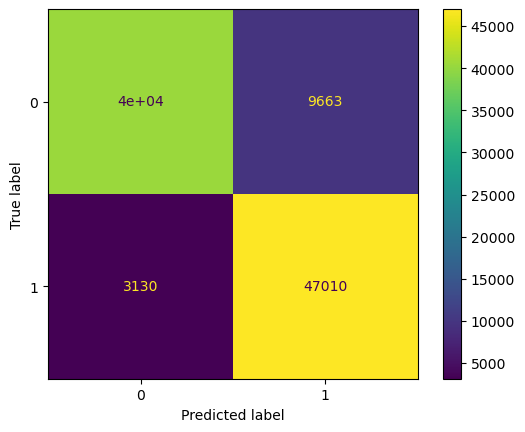

In [89]:
ConfusionMatrixDisplay.from_predictions(y_smote,RFpredict)

In [90]:
print(classification_report(y_smote,RFpredict))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86     50140
           1       0.83      0.94      0.88     50140

    accuracy                           0.87    100280
   macro avg       0.88      0.87      0.87    100280
weighted avg       0.88      0.87      0.87    100280

